In [129]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/insurance/insurance.csv


# **1]  IMPORTING LIBRARIES**

In [130]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics

# **2]DATA CHECKING AND CLEANING**

Let's first load our data

In [131]:
data=pd.read_csv('/kaggle/input/insurance/insurance.csv')

Checking the first few line of the dataset:

In [132]:
data.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


Information about the columns:

In [133]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


Statistics about the values:

In [134]:
data.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


Checking shape of our data:

In [135]:
data.shape

(1338, 7)

Let's check for missing values:

In [136]:
data.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

Checking for total number of rows and coulmns in dataset:

In [137]:
print('Number of rows :',data.shape[0])

print('Number of columns :',data.shape[1])


Number of rows : 1338
Number of columns : 7


# **3]EXPLAROTARY DATA ANALYSIS**

In this step, let's first check the distribution of the variables, to see if everything's in order.



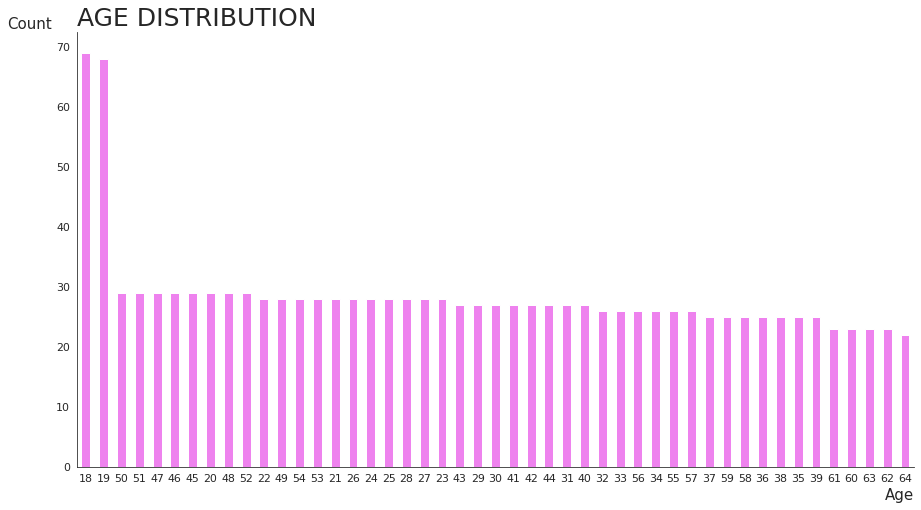

In [138]:
plt.figure(figsize=(15,8))
data.age.value_counts().plot(kind='bar',color='VIOLET')
plt.title('AGE DISTRIBUTION',fontdict={'fontsize':25},loc='left')
plt.xticks(fontsize=11,rotation=0)
plt.yticks(fontsize=11)

plt.xlabel('Age',fontsize=15,loc='right')
plt.ylabel('Count',fontsize=15,rotation=0,loc='top')
sns.despine()

plt.show()

From Age Distribution it is easily visualized that there are approx 30 people with age range 50 to 64 while age 18 and 19 appears to be having almost 70 people.

Let's analyze Gender distribution between men and women

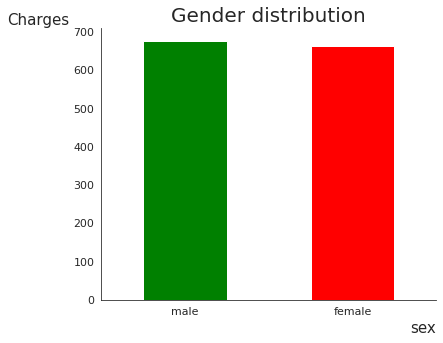

In [139]:
plt.figure(figsize=(6,5))
data.sex.value_counts().plot(kind='bar',color=['GREEN','RED'])
plt.xticks(fontsize=11,rotation=0)
plt.yticks(fontsize=11)
plt.title('Gender distribution',fontdict={'fontsize':20},loc='center')
plt.xlabel('sex',fontsize=15,loc='right')
plt.ylabel('Charges',fontsize=15,rotation=0,loc='top')
sns.despine()

plt.show()

The distribution is almost 50-50. Let's check:

In [140]:
print('Percentage of male:',round((data['sex']=='male').sum() / len(data)*100,3),'%')
print('Percentage of female:',round((data['sex']=='female').sum() / len(data)*100,3),'%')

Percentage of male: 50.523 %
Percentage of female: 49.477 %


Analysis for BMI distribution:

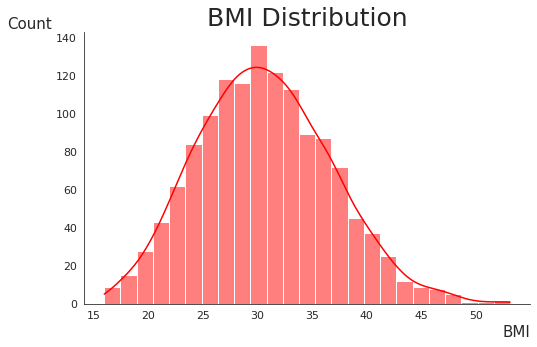

In [141]:
plt.figure(figsize=(8,5))
sns.histplot(data['bmi'],kde=True,color='RED')
plt.xticks(fontsize=11,rotation=0)
plt.yticks(fontsize=11)
plt.title('BMI Distribution',fontdict={'fontsize':25})
plt.xlabel('BMI',fontsize=15,loc='right')
plt.ylabel('Count',fontsize=15,rotation=0,loc='top')
sns.despine()
sns.set_style('white')
plt.show()

We got almost even distribution for BMI values which is centered around 30 BMI

Is the number of children a person has well distributed?

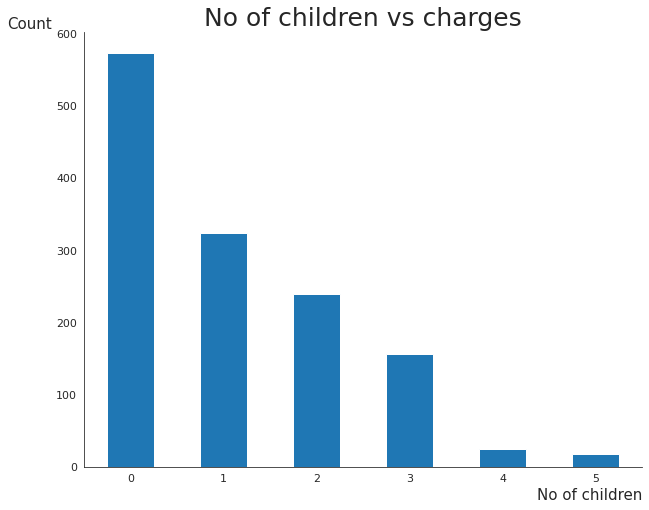

In [142]:
plt.figure(figsize=(10,8))
data.children.value_counts().plot(kind='bar')
plt.xticks(fontsize=11,rotation=0)
plt.yticks(fontsize=11)
plt.title('No of children vs charges',fontdict={'fontsize':25})
plt.xlabel('No of children',fontsize=15,loc='right')
plt.ylabel('Count',fontsize=15,rotation=0,loc='top')
sns.despine()
sns.set_style('white')
plt.show()

Do we have more smokers or non-smokers?

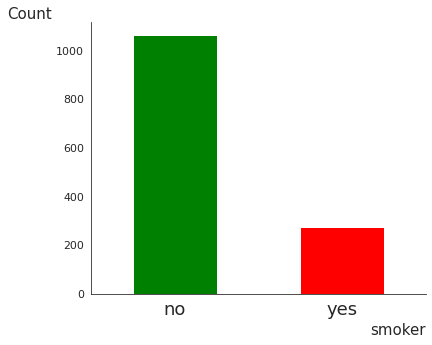

In [143]:
plt.figure(figsize=(6,5))
data.smoker.value_counts().plot(kind='bar',color=['GREEN','RED'])
plt.xticks(fontsize=18,rotation=0)
plt.yticks(fontsize=11)
plt.title('',fontdict={'fontsize':20},loc='center')
plt.xlabel('smoker',fontsize=15,loc='right')
plt.ylabel('Count',fontsize=15,rotation=0,loc='top')
sns.despine()

plt.show()

It is concluded that non smokers are more in number than smoker people in our dataset.

Here we checked for Regionwise distribution for our dataset:

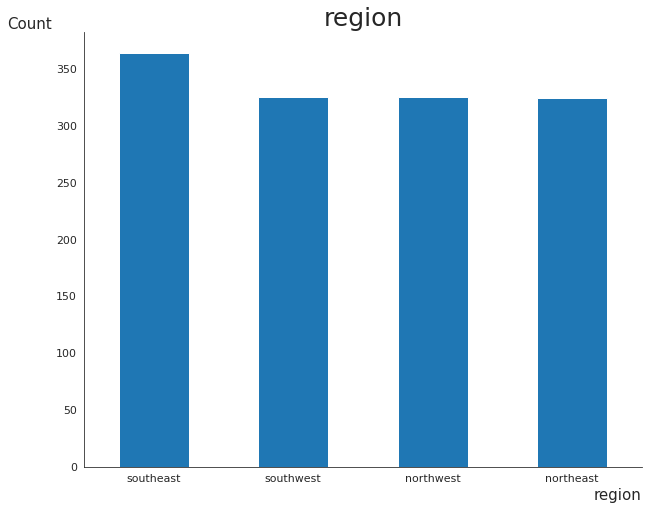

In [144]:
plt.figure(figsize=(10,8))
data.region.value_counts().plot(kind='bar')
plt.xticks(fontsize=11,rotation=0)
plt.yticks(fontsize=11)
plt.title('region',fontdict={'fontsize':25})
plt.xlabel('region',fontsize=15,loc='right')
plt.ylabel('Count',fontsize=15,rotation=0,loc='top')
sns.despine()
sns.set_style('white')
plt.show()

People from Southeast are little bit more over other regions in dataset.

Distribution for charges over the people :

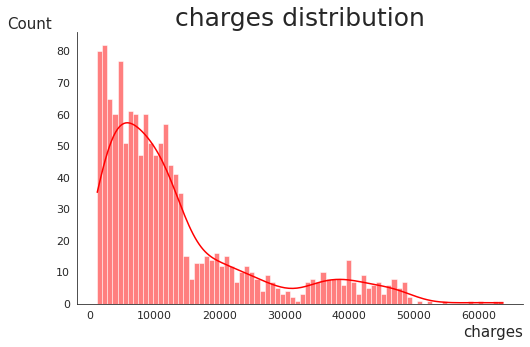

In [145]:
plt.figure(figsize=(8,5))
sns.histplot(data['charges'],kde=True,color='RED',bins=80)
plt.xticks(fontsize=11,rotation=0)
plt.yticks(fontsize=11)
plt.title('charges distribution',fontdict={'fontsize':25})
plt.xlabel('charges',fontsize=15,loc='right')
plt.ylabel('Count',fontsize=15,rotation=0,loc='top')
sns.despine()
sns.set_style('white')
plt.show()

We have a distrubution skewed to the right here in the charges, which means that the majority of people pay less than 15000 USD in insurance.

Now let's check each variable against the charges to see how they relate.

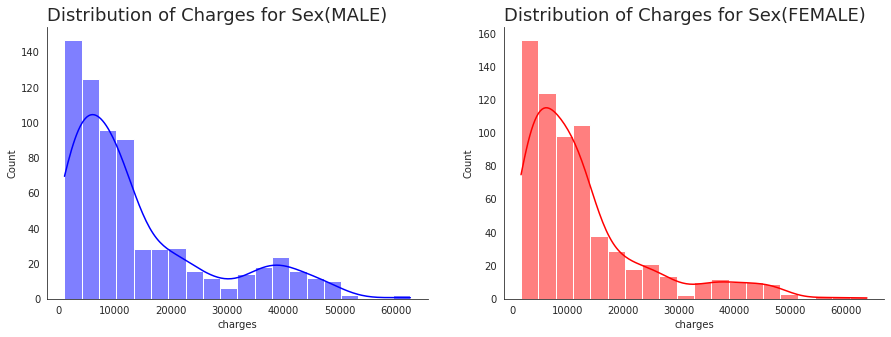

In [146]:
fig=plt.figure(figsize=(15,5))
ax1=fig.add_subplot(121)
sns.histplot(data[data['sex']=='male']['charges'],color='BLUE',kde=True,bins=20,ax=ax1)
ax1.set_title('Distribution of Charges for Sex(MALE)', fontdict = {'fontsize': 18}, loc = 'left')


ax1=fig.add_subplot(122)
sns.histplot(data[data['sex']=='female']['charges'],color='RED',kde=True,bins=20,ax=ax1)
ax1.set_title('Distribution of Charges for Sex(FEMALE)', fontdict = {'fontsize': 18}, loc = 'left')

sns.despine()
plt.show()



Visually, there's not much of a difference in charges for men and women.

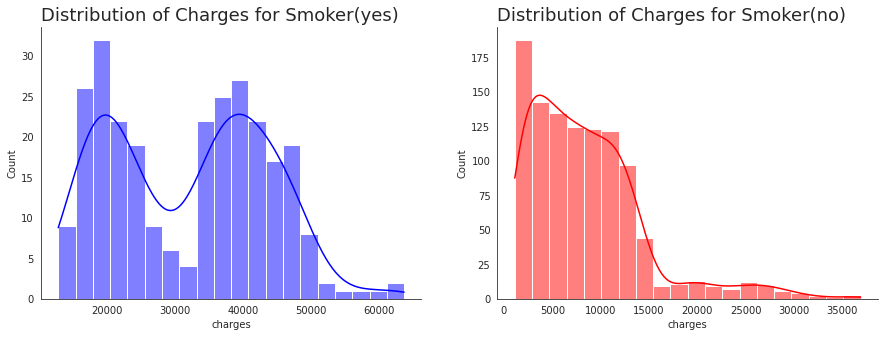

In [147]:
fig=plt.figure(figsize=(15,5))
ax2=fig.add_subplot(121)
sns.histplot(data[(data.smoker=='yes')]['charges'],color='BLUE',kde=True,bins=20,ax=ax2)
ax2.set_title('Distribution of Charges for Smoker(yes)', fontdict = {'fontsize': 18}, loc = 'left')

ax2=fig.add_subplot(122)
sns.histplot(data[(data.smoker=='no')]['charges'],color='RED',kde=True,bins=20,ax=ax2)
ax2.set_title('Distribution of Charges for Smoker(no)', fontdict = {'fontsize': 18}, loc = 'left')

sns.despine()

plt.show()

We see that the charges are significantly higher for smokers.

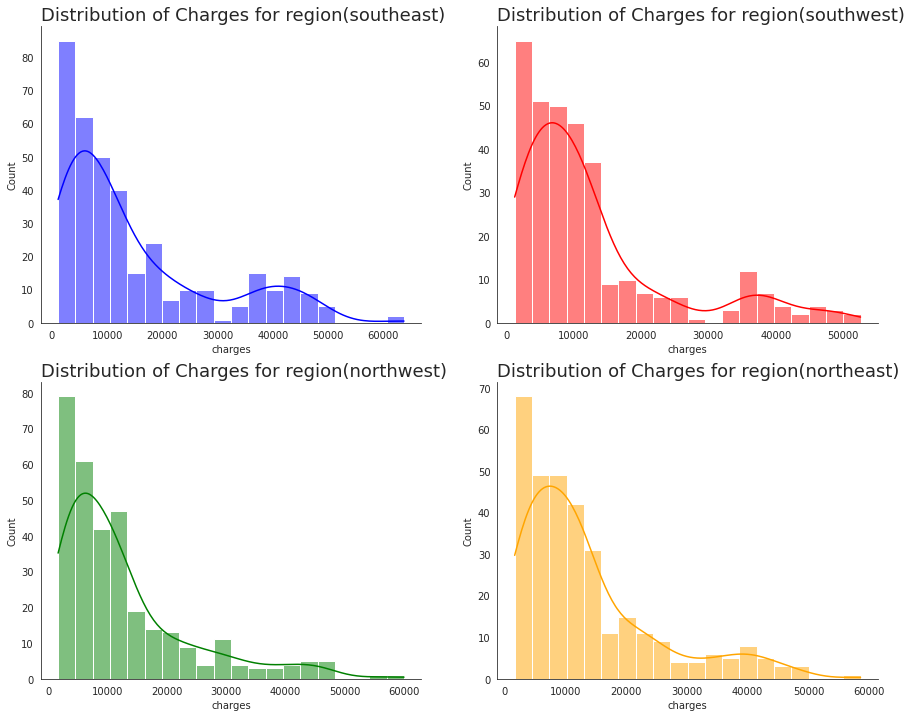

In [148]:
fig = plt.figure(figsize = (15, 12))

ax1=fig.add_subplot(221)
sns.histplot(data[data['region']=='southeast']['charges'],color='BLUE',kde=True,bins=20,ax=ax1)
ax1.set_title('Distribution of Charges for region(southeast)', fontdict = {'fontsize': 18}, loc = 'left')


ax1=fig.add_subplot(222)
sns.histplot(data[data['region']=='southwest']['charges'],color='RED',kde=True,bins=20,ax=ax1)
ax1.set_title('Distribution of Charges for region(southwest)', fontdict = {'fontsize': 18}, loc = 'left')

ax1=fig.add_subplot(223)
sns.histplot(data[data['region']=='northwest']['charges'],color='GREEN',kde=True,bins=20,ax=ax1)
ax1.set_title('Distribution of Charges for region(northwest)', fontdict = {'fontsize': 18}, loc = 'left')


ax1=fig.add_subplot(224)
sns.histplot(data[data['region']=='northeast']['charges'],color='ORANGE',kde=True,bins=20,ax=ax1)
ax1.set_title('Distribution of Charges for region(northeast)', fontdict = {'fontsize': 18}, loc = 'left')



sns.despine()
plt.show()

Regionwise distribution for charges are alomst similer in all 4 regions,but little bit more for southeast people.


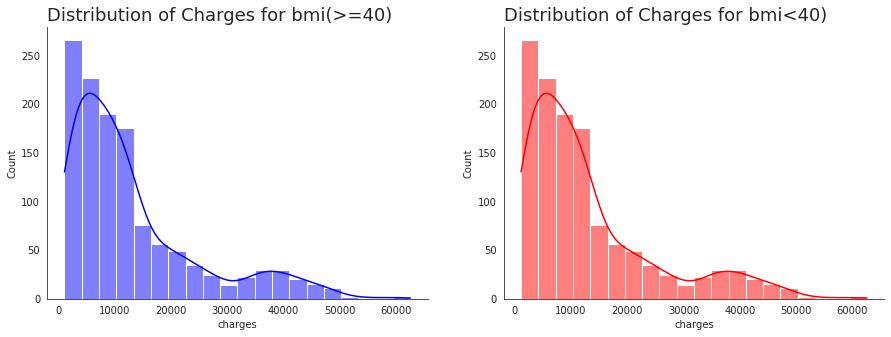

In [149]:
fig=plt.figure(figsize=(15,5))
ax3=fig.add_subplot(121)
sns.histplot(data[(data.bmi<=40)]['charges'],color='BLUE',kde=True,bins=20,ax=ax3)
ax3.set_title('Distribution of Charges for bmi(>=40)', fontdict = {'fontsize': 18}, loc = 'left')

ax3=fig.add_subplot(122)
sns.histplot(data[(data.bmi<40)]['charges'],color='RED',kde=True,bins=20,ax=ax3)
ax3.set_title('Distribution of Charges for bmi<40)', fontdict = {'fontsize': 18}, loc = 'left')


sns.despine()
plt.show()

A BMI of 40 or more falls under the category of severe obesity, so it makes sense for people in this range to have higher prices in insurance.

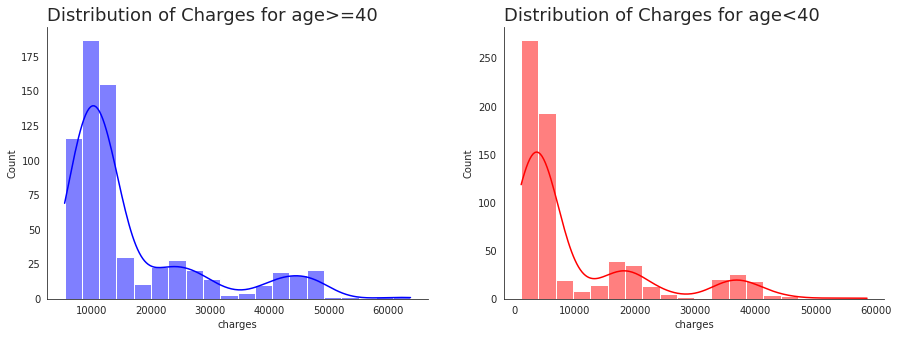

In [150]:
fig=plt.figure(figsize=(15,5))
ax4=fig.add_subplot(121)
sns.histplot(data[(data.age>=40)]['charges'],color='BLUE',kde=True,bins=20,ax=ax4)
ax4.set_title('Distribution of Charges for age>=40', fontdict = {'fontsize': 18}, loc = 'left')

ax4=fig.add_subplot(122)
sns.histplot(data[(data.age<40)]['charges'],color='RED',kde=True,bins=20,ax=ax4)
ax4.set_title('Distribution of Charges for age<40', fontdict = {'fontsize': 18}, loc = 'left')



sns.despine()
plt.show()

The charges distribution by age is about the same, but just a bit higher in 40 years old or more.

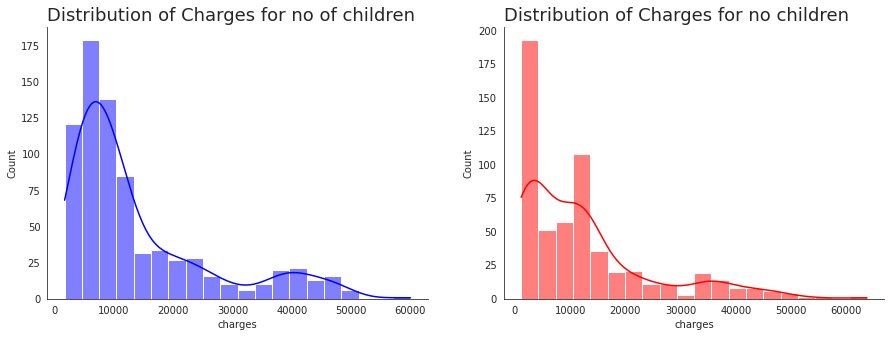

In [151]:
fig=plt.figure(figsize=(15,5))
ax5=fig.add_subplot(121)
sns.histplot(data[(data.children!=0)]['charges'],color='BLUE',kde=True,bins=20,ax=ax5)
ax5.set_title('Distribution of Charges for no of children', fontdict = {'fontsize': 18}, loc = 'left')

ax5=fig.add_subplot(122)
sns.histplot(data[(data.children==0)]['charges'],color='RED',kde=True,bins=20,ax=ax5)
ax5.set_title('Distribution of Charges for no children', fontdict = {'fontsize': 18}, loc = 'left')



sns.despine()
plt.show()

People with children pay more in insurance prices.

**4]FEATURE IMPORTANCE**

Here we'll check how the data correlates with each other.

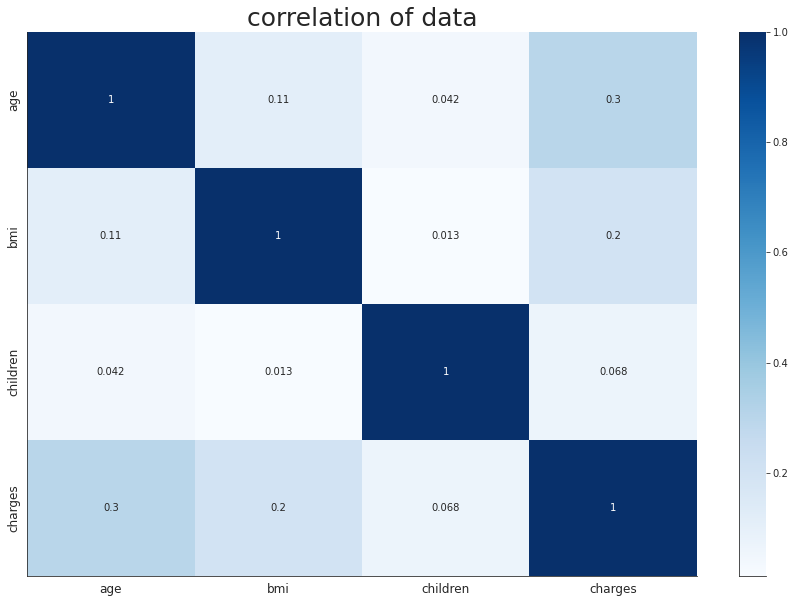

In [152]:
plt.figure(figsize=(15,10))
sns.heatmap(data.corr(),cmap='Blues',annot=True)
plt.title('correlation of data',fontdict={'fontsize':25},loc='center')
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
sns.despine()
plt.show()

There is no really significant correlation between numerical values.

Let's check how the variables influence the charges.

In [153]:
df=data.copy()



In [154]:

print(' The Correlation of age with charges is :',round((data['age'].corr(df['charges'])),3))


 The Correlation of age with charges is : 0.299


In [155]:
print(' The Correlation of bmi with charges is :',round((data['bmi'].corr(data['charges'])),3))


 The Correlation of bmi with charges is : 0.198


In [156]:
df.sex = df.sex.map({"female": 0, "male": 1})
print(' The Correlation of gender with charges is :',round(df['sex'].corr(df['charges']),3))


 The Correlation of gender with charges is : 0.057


In [157]:
print(' The Correlation of no of children with charges is :',round((df['children'].corr(df['charges'])),3))

 The Correlation of no of children with charges is : 0.068


The "region" column is trickier to check the correlation against the charges because we don't have a binary variable. We can use some statistical tests to check the correlation, but checking manually (changing the values for the mapping) gives us somewhat similar results: very low correlation between the region and the charges.

In [158]:
df.region=df.region.map({'southwest': 0, 'southeast': 1, 'northwest': 2, 'northeast': 3})
print(' The Correlation of region with charges is :',round(df['region'].corr(df['charges']),3))

 The Correlation of region with charges is : 0.006


From this we see that the variable that most affects is if someone smokes or not, followed by a person's age and BMI. All of this makes sense in the "real world".

# **4]MODEL PREDICTION**

> # 4.1 DATA PREPARATION

Here we will change the categorical variables to numerical (but still categorical) variables. We'll do this by mapping each word to a value. It's preferable to encode the variables using One Hot Encoding, but for the purpose of this project we'll do a simple mapping.

In [159]:
data.sex.replace({'male':1,'female':0},inplace=True)
data.smoker.replace({'yes':1,'no':0},inplace=True)
data.region.replace({'southwest': 0, 'southeast': 1, 'northwest': 2, 'northeast': 3},inplace=True)
data.head()

,age,sex,bmi,children,smoker,region,charges
0,19,0,27.900,0,1,0,16884.92400
1,18,1,33.770,1,0,1,1725.55230
2,28,1,33.000,3,0,1,4449.46200
3,33,1,22.705,0,0,2,21984.47061
4,32,1,28.880,0,0,2,3866.85520


Getting our x:

In [160]:
x=data.drop(columns=['charges'],axis=1)
x.head()


,age,sex,bmi,children,smoker,region
0,19,0,27.900,0,1,0
1,18,1,33.770,1,0,1
2,28,1,33.000,3,0,1
3,33,1,22.705,0,0,2
4,32,1,28.880,0,0,2


Getting our y:

In [161]:
y=data.charges
y.head()

0    16884.92400
1     1725.55230
2     4449.46200
3    21984.47061
4     3866.85520
Name: charges, dtype: float64

Splitting the data :

In [162]:
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=42847)

As seen above, we split our data only in two parts, train and test, without the validation part. We'll still validate our results, but we'll do it in the test set, seeing as our dataset has a small number of data points at our disposal.

> > #  1)Linear regression


In [163]:
linreg=LinearRegression()

In [164]:
linreg.fit(x_train,y_train)

LinearRegression()

In [165]:
y_pred=linreg.predict(x_test)

In [166]:
print('x_train size:',x_train.shape,'\ny_train size:',y_train.size,'\nx_test size:',x_test.shape,'\ny_test size:',y_test.size)

x_train size: (1003, 6) 
y_train size: 1003 
x_test size: (335, 6) 
y_test size: 335


In [167]:
mse=metrics.mean_squared_error(y_test,y_pred)
rmse=np.sqrt(mse)
mae=metrics.mean_absolute_error(y_test,y_pred)
print('mse : ',mse,'\nrmse : ',rmse,'\nmae : ',mae)

mse :  43075124.02775942 
rmse :  6563.164178028721 
mae :  4532.344040252324


> > # 2) random forest regression

In [168]:
from sklearn.ensemble import RandomForestRegressor

In [169]:
ranfor=RandomForestRegressor(n_estimators=100,max_features='sqrt',max_depth=5,random_state=42847)

In [170]:
ranfor.fit(x_train,y_train)

RandomForestRegressor(max_depth=5, max_features='sqrt', random_state=42847)

In [171]:
y_pred=ranfor.predict(x_test)

In [172]:
mse=metrics.mean_squared_error(y_test,y_pred)
rmse=np.sqrt(mse)
mae=metrics.mean_absolute_error(y_test,y_pred)

print('mse : ',mse,'\nrmse : ',rmse,'\nmae : ',mae)

mse :  31102528.767036732 
rmse :  5576.964117424168 
mae :  3588.8552940070217


3)ridge regression

In [173]:
from sklearn.linear_model import Ridge


> > #  3)Ridge Regression

ridge regression tuning:

In [174]:



for i in [0.001,0.01,0.1,1,10,20,50,100]:
    ridge = Ridge(random_state=42847, alpha = i)
    ridge.fit(x_train,y_train)
    y_pred=ridge.predict(x_test) 
    print(f'alpha = {i}')
    
    mse=metrics.mean_squared_error(y_test,y_pred)
    rmse=np.sqrt(mse)
    
    mae=metrics.mean_absolute_error(y_test,y_pred)
    
    print('mse : ',mse,'\nrmse : ',rmse,'\nmae : ',mae)

    print('----------------------------------')
    
    



alpha = 0.001
mse :  43075145.574236296 
rmse :  6563.165819498719 
mae :  4532.354704609763
----------------------------------
alpha = 0.01
mse :  43075339.87739597 
rmse :  6563.180622030448 
mae :  4532.4506774434
----------------------------------
alpha = 0.1
mse :  43077320.96010656 
rmse :  6563.331544277385 
mae :  4533.409774242616
----------------------------------
alpha = 1
mse :  43100886.66233783 
rmse :  6565.126553413714 
mae :  4542.960457837963
----------------------------------
alpha = 10
mse :  43666376.45297381 
rmse :  6608.0539081467705 
mae :  4640.134887424645
----------------------------------
alpha = 20
mse :  44837115.83096031 
rmse :  6696.052257185595 
mae :  4749.60883052097
----------------------------------
alpha = 50
mse :  50150770.398728475 
rmse :  7081.720864219973 
mae :  5057.258099311608
----------------------------------
alpha = 100
mse :  60500857.66544629 
rmse :  7778.229725679635 
mae :  5481.880112578642
----------------------------------


Best alpha from above values of alpha is the aplha at which RMSE value is minimum

In [175]:
ridge = Ridge(random_state = 42847, alpha =0.001)
mse=metrics.mean_squared_error(y_test,y_pred)
rmse=np.sqrt(mse)
mae=metrics.mean_absolute_error(y_test,y_pred)
print('mse : ',mse,'\nrmse : ',rmse,'\nmae : ',mae)

mse :  60500857.66544629 
rmse :  7778.229725679635 
mae :  5481.880112578642


> > # 4)Lasso Regression

In [176]:
from sklearn.linear_model import Lasso

Lasso regression tuning:

In [177]:


for i in [0.001,0.01,0.1,1,10,20,50,100]:
    lasso = Lasso(random_state = 42847, alpha = i)
    
   
    lasso.fit(x_train,y_train)
    y_pred=lasso.predict(x_test) 
    
    print(f'alpha = {i}')
    
    mse=metrics.mean_squared_error(y_test,y_pred)
    rmse=np.sqrt(mse)
    mae=metrics.mean_absolute_error(y_test,y_pred)
    
    
    print('mse : ',mse,'\nrmse : ',rmse,'\nmae : ',mae)

    print('----------------------------------')

print(np.min(rmse),f'alpha = {i}')

alpha = 0.001
mse :  43075122.933862515 
rmse :  6563.164094692629 
mae :  4532.344275084648
----------------------------------
alpha = 0.01
mse :  43075113.09383485 
rmse :  6563.163345052052 
mae :  4532.34638857692
----------------------------------
alpha = 0.1
mse :  43075014.73389396 
rmse :  6563.155851714476 
mae :  4532.367523446213
----------------------------------
alpha = 1
mse :  43074041.26324039 
rmse :  6563.081689514492 
mae :  4532.578870650714
----------------------------------
alpha = 10
mse :  43072274.38819321 
rmse :  6562.947081014231 
mae :  4535.493854707586
----------------------------------
alpha = 20
mse :  43073988.219882786 
rmse :  6563.077648472764 
mae :  4539.005736291017
----------------------------------
alpha = 50
mse :  43090220.98201787 
rmse :  6564.314205004043 
mae :  4550.123842944293
----------------------------------
alpha = 100
mse :  43154246.47579757 
rmse :  6569.189179480035 
mae :  4569.691781371792
----------------------------------
6

In [178]:
lasso = Lasso(random_state = 42847, alpha =0.001)
mse=metrics.mean_squared_error(y_test,y_pred)
rmse=np.sqrt(mse)
mae=metrics.mean_absolute_error(y_test,y_pred)
print('mse : ',mse,'\nrmse : ',rmse,'\nmae : ',mae)

mse :  43154246.47579757 
rmse :  6569.189179480035 
mae :  4569.691781371792


> > #  5)Support vector machine

In [179]:
from sklearn.svm import SVR

In [180]:
svc=SVR(kernel='linear')
svc.fit(x_train,y_train)

SVR(kernel='linear')

In [181]:
svc.predict(x_test)


array([ 5979.20033001, 10160.91128518,  3273.50970029, 13717.32248418,
        7731.98594181,  7875.70760909, 13693.83990148, 13863.47549776,
        9958.01152783,  1922.27667062,  1653.16842235, 10314.86411434,
        8978.68495092,  5648.76936139,  4138.86107638,  1526.26441024,
       13568.51784543,  9237.89571425,  9656.3350905 ,  8165.11388706,
       11933.82125238,  9418.20189383,  1626.43170503, 10361.91978121,
       12693.88932658, 11516.36368908,  6688.53181481,  5100.28908848,
        6002.03806957,  1262.16878308,  4201.79674289, 11997.60487941,
        9198.13913824, 12520.90788817, 12876.36052792,  3959.92268338,
        1632.42357061,  6214.38770127,  8817.15016451,  8368.06636781,
        3648.84514211,  8585.53318362, 13893.92951135, 11864.82644611,
       12593.47724449, 10743.4960043 , 12706.90756646,  2767.10605852,
        6659.64270753,  9995.70513013,  9644.05152974, 12868.07343961,
        4713.56493691,  2400.01130411,  4873.36688542,  4929.77054162,
      

In [182]:
mse=metrics.mean_squared_error(y_test,y_pred)
rmse=np.sqrt(mse)
mae=metrics.mean_absolute_error(y_test,y_pred)
print('mse : ',mse,'\nrmse : ',rmse,'\nmae : ',mae)

mse :  43154246.47579757 
rmse :  6569.189179480035 
mae :  4569.691781371792


We see that the model that gives us the least Root Mean Squared Error is the RandomForestRegressor. So let's go ahead and save it.

# **5]MODEL RESULT**

Let's see the features for Random Forest Regressor:

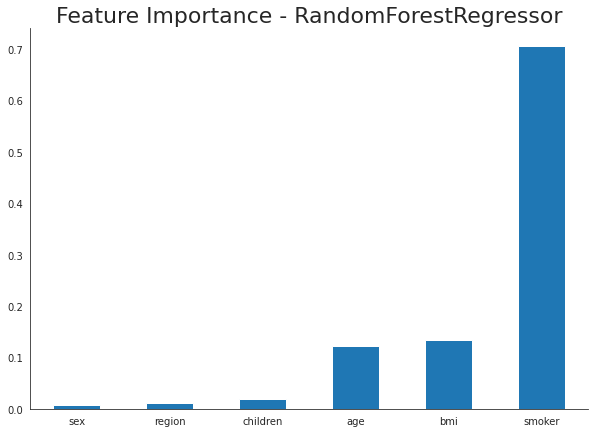

In [184]:
feat_import_ranfor = pd.Series(ranfor.feature_importances_, index = x_train.columns)
ax = feat_import_ranfor.sort_values(ascending = True).plot(kind = 'bar', figsize = (10, 7))
plt.xticks(rotation=0)
plt.title('Feature Importance - RandomForestRegressor', fontsize = 22)
sns.despine()
plt.show()

'Age','bmi','smoker' this factors will play important role in predicting charges of medical insurance of a person.

# **6]SAVING THE MODEL**

In [185]:
import pickle

In [186]:
model = ranfor
output_file = 'model_randomforestregressor.bin'

with open(output_file, 'wb') as f_out:
    pickle.dump(model, f_out)

# **7]CONCLUSION**

We've that the variables that most influence the price of the health insurance are: smoker, age and BMI. By applying a machine learning model to our data, we've found that the RandomForestRegressor was the best in our case.